# 1- Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.exceptions
from skopt import BayesSearchCV
from scipy.stats import f_oneway
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
% matplotlib inline

# 2- Load data and drop unused column

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test.insert(loc=len(df_test.columns), column="medv", value=np.nan)
df = df_train.append(df_test, ignore_index=True, sort=False)
df = df.drop(['ID'], axis=1)

# 3- Remove duplicates if any and preview the data

In [3]:
print(len(df))
df = df.drop_duplicates()
df.head()

506


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# 4- Summarized information of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


# 5- Check for unique values and normalize if necessary

In [5]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       192
dtype: int64

# 6- Statistical description of the data

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,333.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.768769
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.173468
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.400000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.600000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 7- Visualize the data

## Distribution of the output variable with histogram

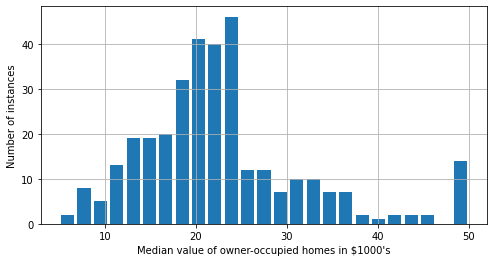

In [7]:
df["medv"].hist(bins=25, figsize=(8, 4), rwidth=0.8)
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel("Number of instances")
plt.show()

## Distribution of the output variable with a boxplot

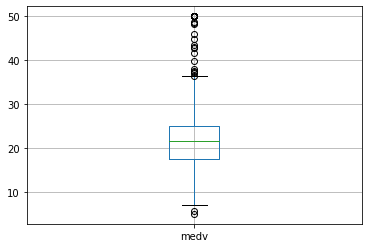

In [8]:
df.boxplot(['medv'])

## Numerical feature distributions with boxplots

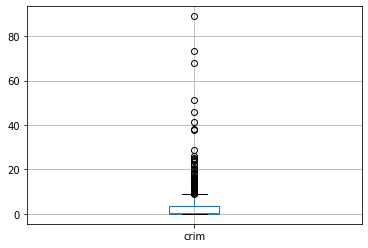

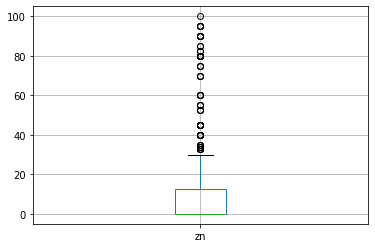

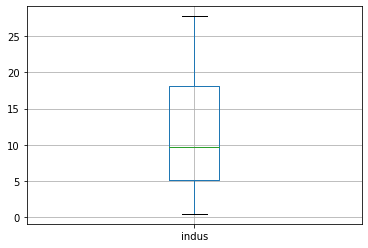

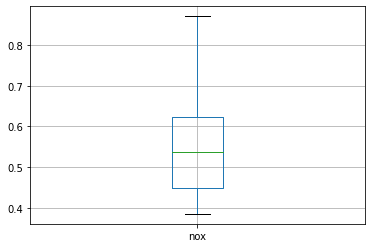

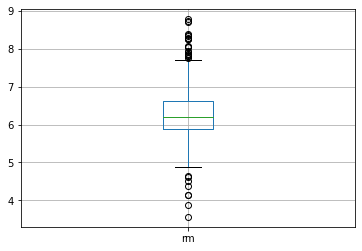

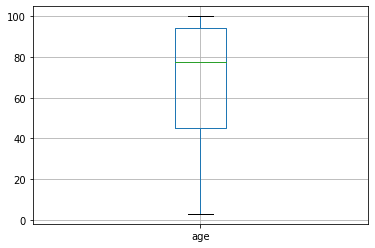

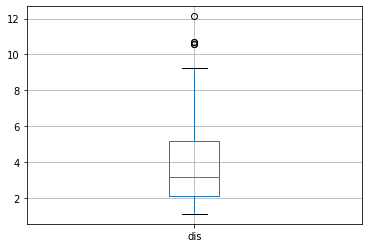

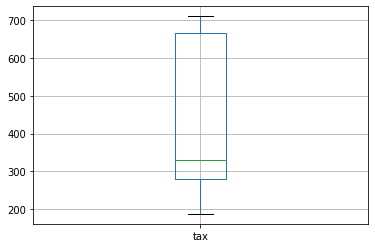

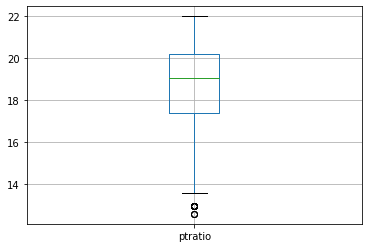

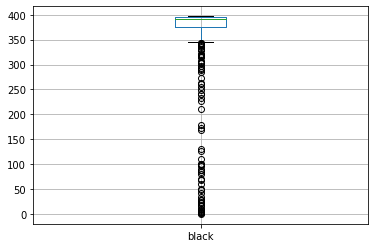

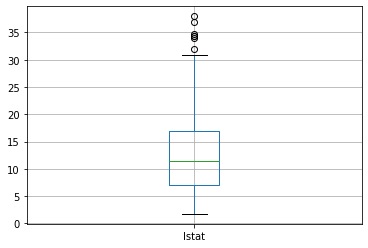

In [9]:
for column in df.drop(['medv', 'chas', 'rad'], axis=1):
    plt.figure()
    df.boxplot([column])

## Numerical feature distributions with histograms

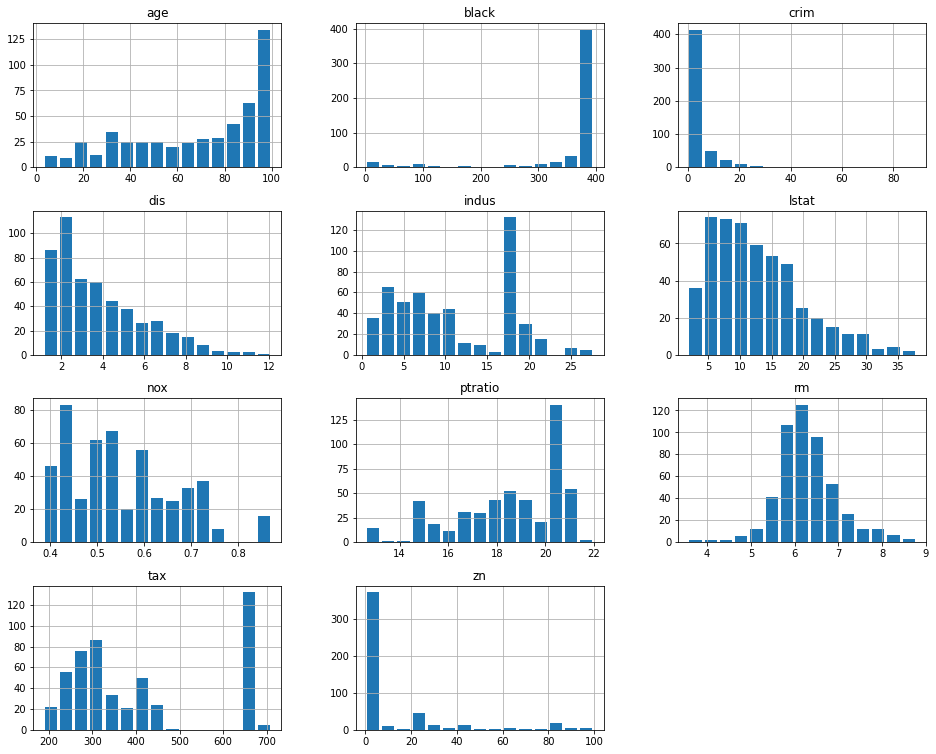

In [10]:
df.drop(['medv', 'chas', 'rad'], axis=1).hist(bins=15, figsize=(16, 13), rwidth=0.8)
plt.show()

## Normalize highly skewed columns with log transformation

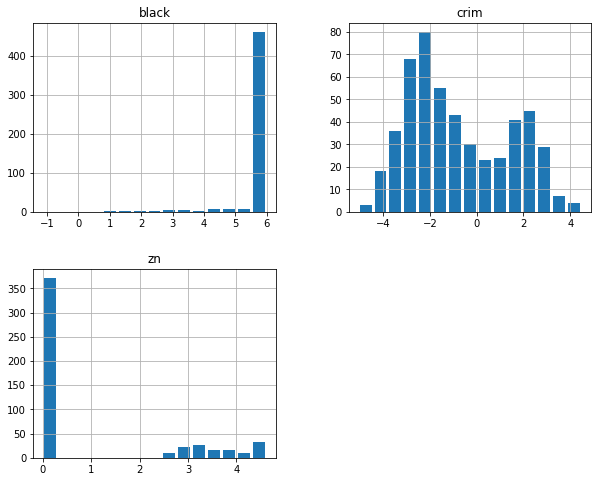

In [11]:
df['crim'] = df['crim'].apply(lambda x: np.log(x))
df['zn'] = df['zn'].apply(lambda x: np.log(1+x))
df['black'] = df['black'].apply(lambda x: np.log(x))

df[['crim', 'zn', 'black']].hist(bins=15, figsize=(10, 8), rwidth=0.8)
plt.show()

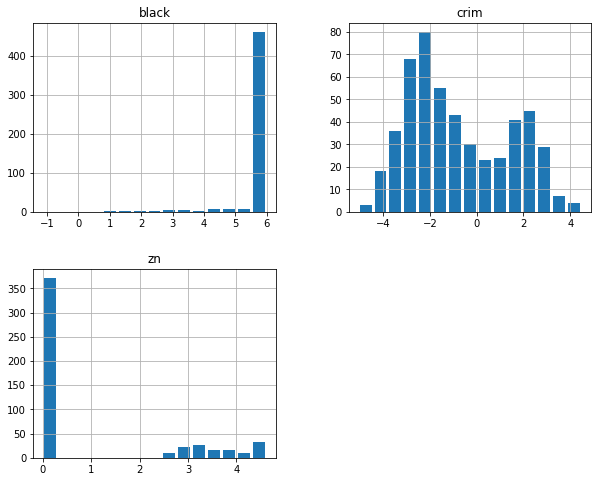

In [12]:
df[['crim', 'zn', 'black']].hist(bins=15, figsize=(10, 8), rwidth=0.8)
plt.show()

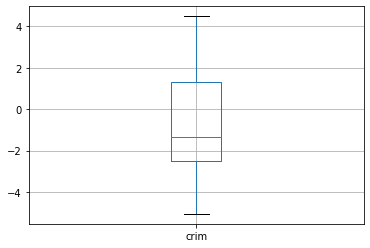

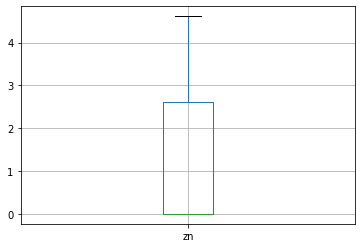

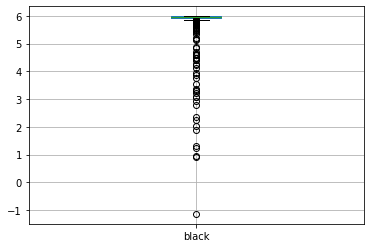

In [13]:
for column in ['crim', 'zn', 'black']:
    plt.figure()
    df.boxplot([column])

## Categorical feature value counts with bar charts

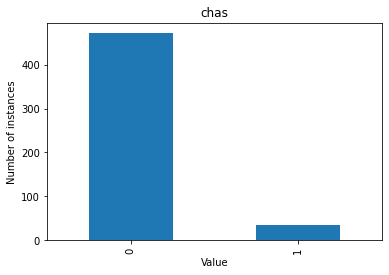

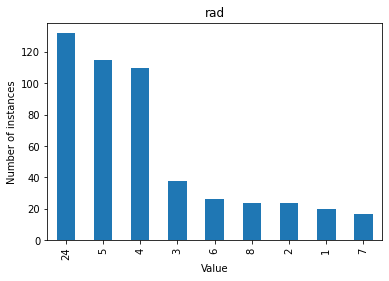

In [14]:
for column in ['chas', 'rad']:
    ax = df[column].value_counts().plot.bar(title=column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of instances")
    plt.show()

## Numerical Feature-Output-variable distributions with scatter plots

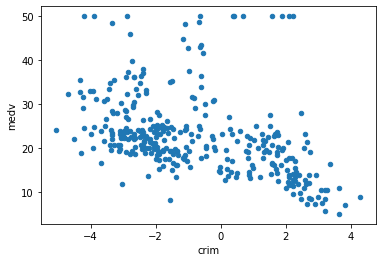

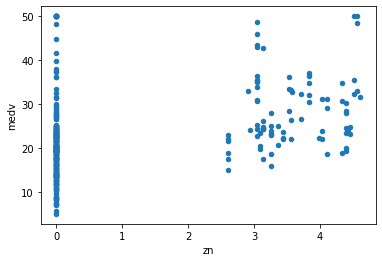

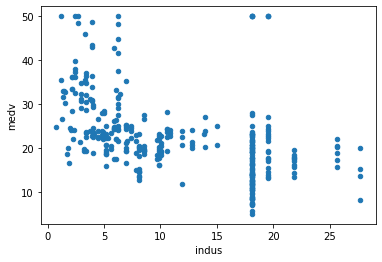

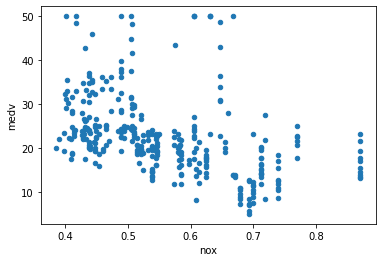

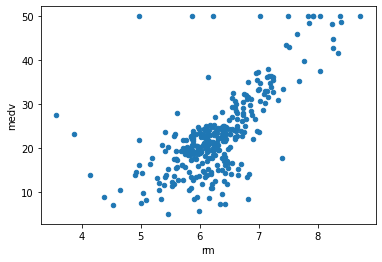

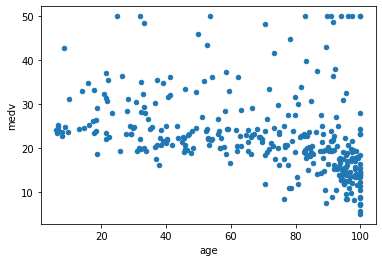

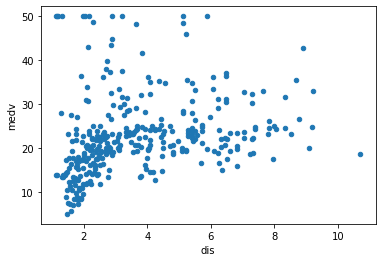

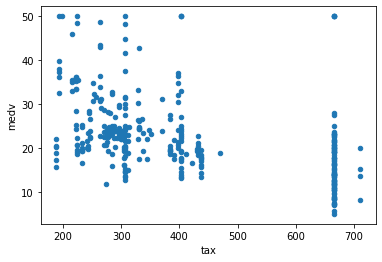

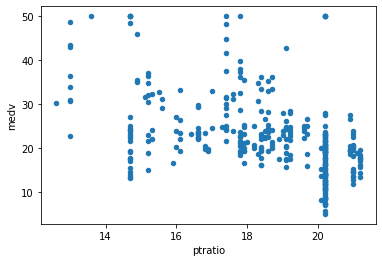

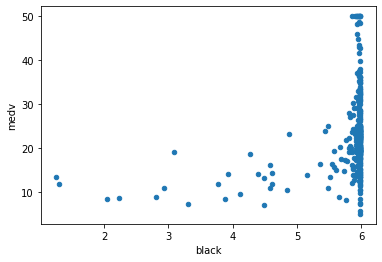

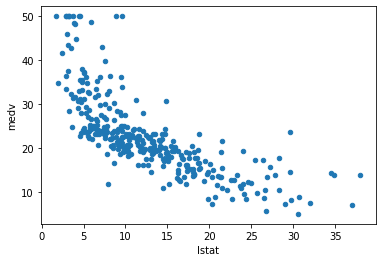

In [15]:
for column in df.drop(['medv', 'chas', 'rad'], axis=1):
    df.plot.scatter(x=column, y='medv')

## Numerical Feature-Output correlations with a heatmap

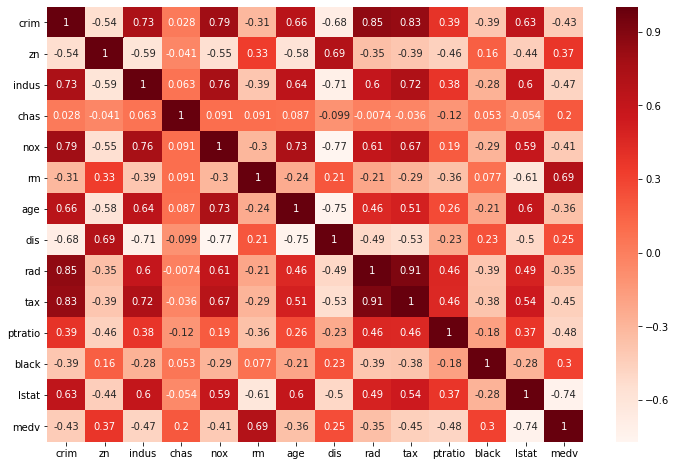

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

## Categorical Feature-Output-variable distributions with side-by-side boxplots

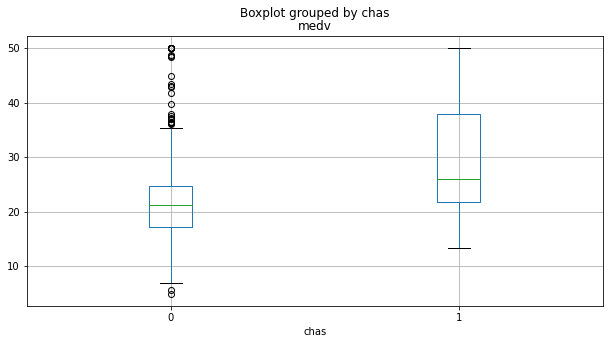

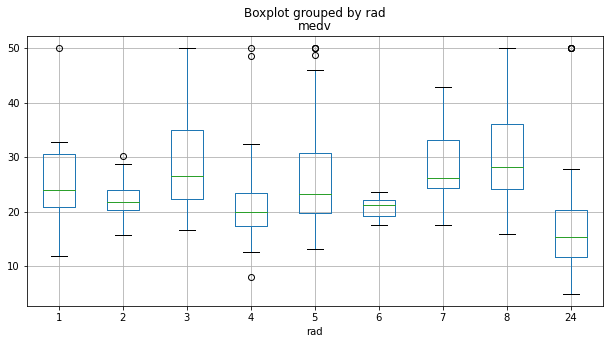

In [17]:
for column in ['chas', 'rad']:
    df.boxplot(column='medv', by=column, figsize=(10, 5), vert=True)

## Categorical Feature-Output-variable relationships with ANOVA

In [18]:
for column in ['chas', 'rad']:
    print(column + ": " + str(f_oneway(*df.groupby(column)['medv'].apply(list))))

chas: F_onewayResult(statistic=nan, pvalue=nan)
rad: F_onewayResult(statistic=nan, pvalue=nan)


# 8- Feature engineering

## Drop irrelevant features according to the previous analysis

In [19]:
df = df.drop(['black'], axis=1)

## Check missing values in columns

In [20]:
df.isnull().sum()

crim         0
zn           0
indus        0
chas         0
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
lstat        0
medv       173
dtype: int64

## Remove irrelevant features (correlation with the target variable lower than 0.2)

In [21]:
correlation_target = abs(df.drop(['chas'], axis=1).corr()['medv'])
irrelevant_features = correlation_target[correlation_target < 0.2]
df = df.drop(irrelevant_features.to_dict().keys(), axis=1)
print(irrelevant_features)

Series([], Name: medv, dtype: float64)


## Remove redundant features (correlation which each other greater than 0.8)

In [22]:
correlation_matrix = df.drop(['medv'], axis=1).corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
redundant_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
# df = df.drop(redundant_features, axis=1)
print(redundant_features)

['rad', 'tax']


## Handle outliers in numerical columns

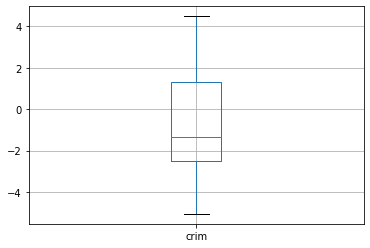

crim: -8.204399430936451, 7.0060308509339215


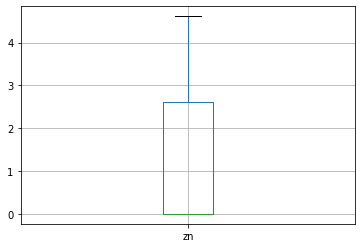

zn: -3.9040345281665756, 6.506724213610959


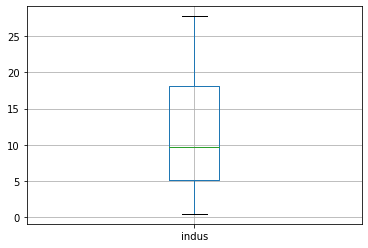

indus: -14.175, 37.465


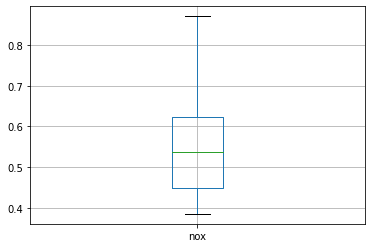

nox: 0.18650000000000005, 0.8865


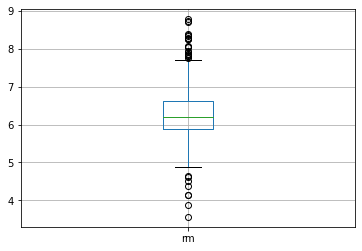

rm: 4.778500000000001, 7.730499999999999


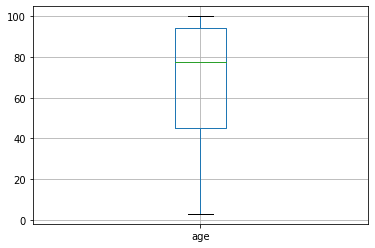

age: -28.54999999999999, 167.64999999999998


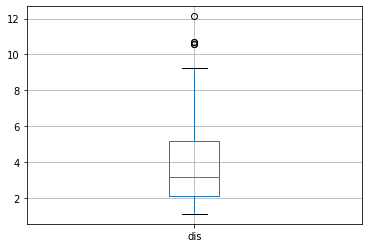

dis: -2.5322000000000005, 9.820800000000002


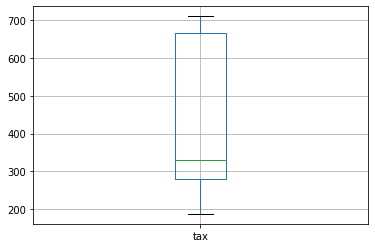

tax: -301.5, 1246.5


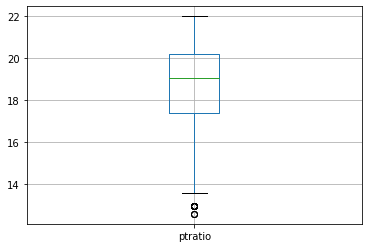

ptratio: 13.199999999999998, 24.4


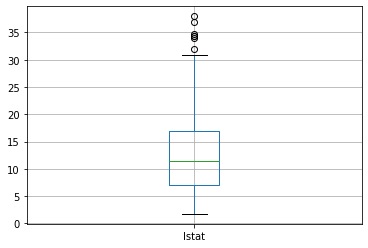

lstat: -8.057500000000005, 31.962500000000006


In [23]:
for column in df.drop(['medv', 'chas', 'rad'], axis=1):
    df.boxplot(column)
    plt.show()
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_boundary = df[column].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[column].quantile(0.75) + (IQR * 1.5)
    print(column + ": " + str(lower_boundary) + ", " + str(upper_boundary))
    df.loc[df[column] >= upper_boundary, column] = upper_boundary
    df.loc[df[column] <= lower_boundary, column] = lower_boundary

# 9- Model construction: Linear Regression

In [24]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,-5.064036,2.944439,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,-3.600502,0.000000,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,-3.430523,0.000000,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
3,-2.672924,0.000000,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
4,-2.427128,2.602690,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,12.43,22.9


## Train and test set

In [25]:
# Check that there are no duplicates before splitting
train, test = df[:len(df_train)], df[len(df_train):]
y_train = train['medv']
X_train = train.drop(['medv'], axis=1)
X_test = test.drop('medv', axis=1)

## Tune model hyperparameters with Bayesian search

In [26]:
# define a search space
params = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}

# instantiate the search, CV: the number of folds for the cross-validation, n_iter controls the number of searches
Bsearch = BayesSearchCV(LinearRegression(), params, cv=5, scoring='neg_mean_squared_error', n_iter=30, random_state=5, verbose=True)

# fit the search with data
Bsearch.fit(X_train, y_train)

# examine the best model
print(Bsearch.best_score_)
print(Bsearch.best_params_)
print(Bsearch.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


-44.88228325518183
OrderedDict([('copy_X', True), ('fit_intercept', True), ('normalize', True)])
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


## Learning curve for various training set sizes

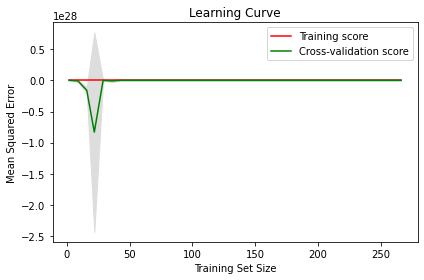

In [27]:
# Create CV training and test scores for various training set sizes (40 different sizes)
train_sizes, train_scores, test_scores = learning_curve(Bsearch.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_mean_squared_error')

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, color='r', label='Training score')
plt.plot(train_sizes, test_mean, color='g', label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('Mean Squared Error'), plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Train the model on the train set

In [28]:
model = Bsearch.best_estimator_.fit(X_train, y_train)

## Evaluate the model on the test set

In [29]:
predictions = model.predict(X_test)
df_submission = pd.DataFrame({'ID': df_test['ID'], 'medv': predictions})
df_submission.to_csv('Boston_Housing_predictions.csv', index=False)

## Feature importance

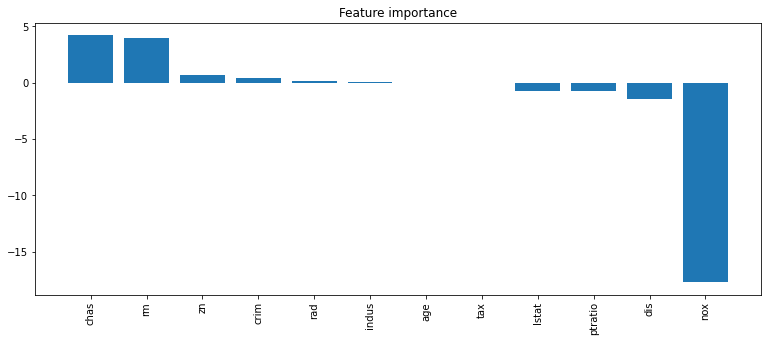

In [30]:
plt.figure(figsize=(13, 5))
feature_importance = pd.DataFrame(data={'Feature': X_train.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance'])
plt.title('Feature importance')
plt.xticks(rotation='vertical')
plt.show()